In [2]:
pip install numpy==1.22

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 2.6 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.22.0 which is incompatible.
moviepy 1.0.3 requires decorator<5.0,>=4.0.2, but you have decorator 5.1.1 which is incompatible.
librosa 0.10.1 requires numpy!=1.22.0,!=1.22.1,!=1.22.2,>=1.20.3, but you have numpy 1.22.0 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import cv2
from deepface import DeepFace
face=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

cap=cv2.VideoCapture("videoreume.mov")
p_frame=0
total_frame=int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(total_frame)
confi=[]
while(cap.isOpened()):
    res,frame=cap.read()
    print("----.>",res)
    if res:  
        p_frame+=1
        print('Frame count : ',p_frame)
        gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        faces=face.detectMultiScale(gray,1.2,6)
        print(len(faces))
        for (x,y,w,h) in faces:
            cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
            font=cv2.FONT_HERSHEY_SIMPLEX
            face_region = frame[y:y + h, x:x + w]
            result=DeepFace.analyze(face_region,actions=['emotion'],enforce_detection=False)
            confi.append(result[0]['dominant_emotion'])
            cv2.putText(frame,f"Emotion:{result[0]['dominant_emotion']}",
                (0,50),font,1,(0,225,0),2,cv2.LINE_4)
            cv2.putText(frame,f"confidence:{result[0]['face_confidence']}",
                (0,150),font,1,(225,225,222),2,cv2.LINE_4)
    cv2.imshow('Frame', frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
   

2024-04-03 15:28:15.053586: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2018
----.> True
Frame count :  1
1
----.> True
Frame count :  2
1
----.> True
Frame count :  3
1
----.> True
Frame count :  4
1
----.> True
Frame count :  5
1
----.> True
Frame count :  6
1
----.> True
Frame count :  7
1
----.> True
Frame count :  8
1
----.> True
Frame count :  9
1
----.> True
Frame count :  10
1
----.> True
Frame count :  11
1
----.> True
Frame count :  12
1
----.> True
Frame count :  13
1
----.> True
Frame count :  14
1
----.> True
Frame count :  15
1
----.> True
Frame count :  16
1
----.> True
Frame count :  17
1
----.> True
Frame count :  18
1
----.> True
Frame count :  19
1
----.> True
Frame count :  20
1
----.> True
Frame count :  21
1
----.> True
Frame count :  22
1
----.> True
Frame count :  23
1
----.> True
Frame count :  24
1
----.> True
Frame count :  25
1
----.> True
Frame count :  26
1
----.> True
Frame count :  27
1
----.> True
Frame count :  28
1
----.> True
Frame count :  29
1
----.> True
Frame count :  30
1
----.> True
Frame count :  31
1
----.> True


In [3]:
element_count={elem:confi.count(elem) for elem in confi}


In [4]:
top_elements=sorted(element_count.items(),key=lambda x:x[1],reverse=True)[:3]
i=1
for element,count in top_elements:
    print("emotion",i,":",element)
    i+=1

emotion 1 : neutral
emotion 2 : sad
emotion 3 : fear


In [5]:
import matplotlib.pyplot as plt

['neutral', 'fear', 'sad', 'angry', 'happy', 'surprise']


<BarContainer object of 6 artists>

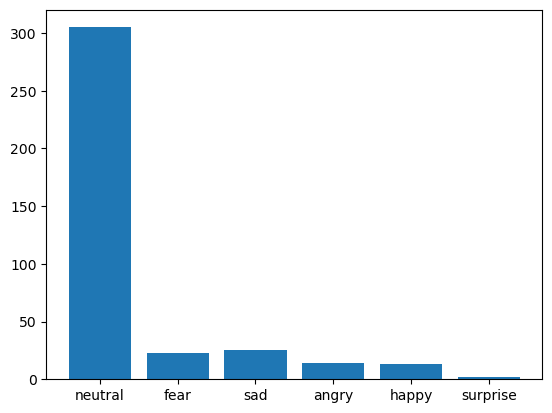

In [6]:
emotions=list(element_count.keys())
counts=list(element_count.values())
print(emotions)
plt.bar(emotions,counts)

In [1]:
import cv2
import time
from deepface import DeepFace

# Load the face cascade classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
#smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')
# Open the video file
cap = cv2.VideoCapture("videoreume.mov")
print(cap.isOpened())
frame_rate = cap.get(cv2.CAP_PROP_FPS)  # Get the frame rate of the video
wait_time = int(1000 / frame_rate*2)  # Calculate the wait time for 1 second per frame

total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print("Total frames:", total_frames)

current_frame = 0
prev_time = time.time()
confidences = []

while cap.isOpened():
    ret, frame = cap.read()
    
    if not ret:
        break

    current_time = time.time()
    elapsed_time = current_time - prev_time

    if elapsed_time >= 1.0:  # Process frame once per second
        prev_time = current_time

        # Perform emotion analysis on the frame
        #result = DeepFace.analyze(frame, actions=['emotion'], enforce_detection=False)
        current_frame += 1
        print('Frame count:', current_frame)

        #gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(frame, scaleFactor=1.1, minNeighbors=7)
        
        print(len(faces))
        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(frame,"FACE",(int(x-.1*x),int(y-.1*y)),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2)
            face_region = frame[y:y + h, x:x + w]
            #roi=gray_frame[y:y + h, x:x + w]
            result = DeepFace.analyze(face_region, actions=['emotion'], enforce_detection=False)
        
            '''smile = smile_cascade.detectMultiScale(
            roi,
            scaleFactor= 1.5,
            minNeighbors=7,
            minSize=(25,25))
            print("---->",len(smile))'''
            cv2.putText(frame, f"Emotion: {result[0]['dominant_emotion']}",
                    (0, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_4)
        '''#cv2.putText(frame, f"Confidence: {result['emotion']['dominance']:.2f}",
                    (0, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_4)'''

        #Append the confidence value to the list
        confidences.append(result[0]['dominant_emotion'])

    cv2.imshow('Frame1', frame)
    if cv2.waitKey(wait_time ) & 0xFF == ord('q'):
        break

# Release the video capture object and close all windows
cap.release()
cv2.destroyAllWindows()


2024-04-03 15:29:18.832250: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


True
Total frames: 2018
Frame count: 1
1
Frame count: 2
1
Frame count: 3
1
Frame count: 4
1
Frame count: 5
1
Frame count: 6
1
Frame count: 7
2
Frame count: 8
1
Frame count: 9
1
Frame count: 10
1
Frame count: 11
1
Frame count: 12
1
Frame count: 13
1
Frame count: 14
1
Frame count: 15
1
Frame count: 16
1
Frame count: 17
2
Frame count: 18
1
Frame count: 19
1
Frame count: 20
1
Frame count: 21
1
Frame count: 22
2
Frame count: 23
1
Frame count: 24
1
Frame count: 25
1
Frame count: 26
1
Frame count: 27
1
Frame count: 28
1
Frame count: 29
1
Frame count: 30
1
Frame count: 31
1
Frame count: 32
1
Frame count: 33
1
Frame count: 34
1
Frame count: 35
1
Frame count: 36
1
Frame count: 37
1
Frame count: 38
1
Frame count: 39
1
Frame count: 40
1
Frame count: 41
1
Frame count: 42
1
Frame count: 43
1
Frame count: 44
1
Frame count: 45
1
Frame count: 46
1
Frame count: 47
1
Frame count: 48
1
Frame count: 49
1
Frame count: 50
2
Frame count: 51
1
Frame count: 52
1
Frame count: 53
1
Frame count: 54
1
Frame count: 

In [2]:
element_count={elem:confidences.count(elem) for elem in confidences}
top_elements=sorted(element_count.items(),key=lambda x:x[1],reverse=True)[:3]
i=1
for element,count in top_elements:
    print("emotion",i,":",element)
    i+=1
print(element_count)

emotion 1 : neutral
emotion 2 : happy
emotion 3 : sad
{'sad': 20, 'neutral': 177, 'angry': 10, 'happy': 32, 'fear': 8, 'surprise': 1}


In [1]:
import matplotlib.pyplot as plt

In [2]:
import cv2
import time
from deepface import DeepFace

# Load the face cascade classifiers
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')

# Open the video file
cap = cv2.VideoCapture("videoreume.mov")

frame_rate = cap.get(cv2.CAP_PROP_FPS)  # Get the frame rate of the video
wait_time = int(1000 / (frame_rate * 2))  # Calculate the wait time for 2 frames per second

total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print("Total frames:", total_frames)

current_frame = 0
prev_time = time.time()
confidences = []
smile_c=0
frame_c=0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    
    current_time = time.time()
    elapsed_time = current_time - prev_time

    if elapsed_time >= 0.5:  # Process frame every 0.5 seconds (two frames per second)
        prev_time = current_time
        frame_c+=1
        
        faces = face_cascade.detectMultiScale(frame, scaleFactor=1.1, minNeighbors=6)
        
    
        print('Number of detected faces:', len(faces))
        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(frame,"FACE",(int(x-.1*x),int(y-.1*y)),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2)
            # Get the face region for DeepFace analysis
            face_region = frame[y:y + h, x:x + w]
            smile = smile_cascade.detectMultiScale(
            face_region,
            scaleFactor= 1.1,
            minNeighbors=6,
            )
            
            
            
            result = DeepFace.analyze(face_region, actions=['emotion'], enforce_detection=False)
            cv2.putText(frame, f"Emotion: {result[0]['dominant_emotion']}",
                    (0, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_4)
            
            for (sx, sy, sw, sh) in smile:
                if len(smile)>0:
                    cv2.rectangle(frame, (sx, sy), ((sx + sw), (sy + sh)), (0, 0, 255), 2)
                    cv2.putText(frame,"smiling",
                        (0, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_4)
                smile_c+=1
            else:
                cv2.putText(frame,"not_smiling",
                        (0, 200), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_4)
            # Perform emotion analysis on the face region
            #result = DeepFace.analyze(face_region, actions=['emotion'], enforce_detection=False)
        confidences.append(result[0]['dominant_emotion'])
        
        cv2.imshow('Frame1', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

# Release the video capture object and close all windows
cap.release()
cv2.destroyAllWindows()


TypeError: Unable to convert function return value to a Python type! The signature was
	() -> handle

In [22]:
print(frame_c)
print(smile_c)

29
29


In [27]:
element_count={elem:confidences.count(elem) for elem in confidences}
top_elements=sorted(element_count.items(),key=lambda x:x[1],reverse=True)[:3]
i=1

for element,count in top_elements:
    print("emotion",i,":",element)
    i+=1
print(element_count)

emotion 1 : happy
emotion 2 : neutral
emotion 3 : angry
{'neutral': 90, 'happy': 118, 'angry': 5, 'sad': 5, 'fear': 3, 'surprise': 1}


In [1]:
# import required libraries
import cv2


# read input image
cap= cv2.VideoCapture("videoreume.mov")
while cap.isOpened():
    ret, img= cap.read()
    if not ret:
        break

# convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # read haar cascade for face detection
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # read haar cascade for smile detection
    smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')

    # Detects faces in the input image
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    print('Number of detected faces:', len(faces))

    # loop over all the faces detected
    for (x,y,w,h) in faces:

       # draw a rectangle in a face
       cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)
       cv2.putText(img, "Face", (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2)
       roi_gray = gray[y:y+h, x:x+w]
       roi_color = img[y:y+h, x:x+w]

       # detecting smile within the face roi
       smiles = smile_cascade.detectMultiScale(roi_gray, 1.8, 20)
       if len(smiles) > 0:
          print("smile detected")
          for (sx, sy, sw, sh) in smiles:
             cv2.rectangle(roi_color, (sx, sy), ((sx + sw), (sy + sh)), (0, 0, 255), 2)
             cv2.putText(roi_color, "smile", (sx, sy),
             cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
       else:
          print("smile not detected")

    # Display an image in a window
    cv2.imshow('Smile_Image',roi_color)
cv2.waitKey(0)
cv2.destroyAllWindows()

Number of detected faces: 1
smile detected
Number of detected faces: 1
smile detected
Number of detected faces: 1
smile detected
Number of detected faces: 1
smile detected
Number of detected faces: 1
smile detected
Number of detected faces: 1
smile detected
Number of detected faces: 1
smile detected
Number of detected faces: 1
smile detected
Number of detected faces: 1
smile detected
Number of detected faces: 1
smile detected
Number of detected faces: 1
smile detected
Number of detected faces: 1
smile detected
Number of detected faces: 1
smile detected
Number of detected faces: 1
smile detected
Number of detected faces: 1
smile detected
Number of detected faces: 1
smile detected
Number of detected faces: 1
smile detected
Number of detected faces: 1
smile detected
Number of detected faces: 1
smile detected
Number of detected faces: 1
smile detected
Number of detected faces: 1
smile detected
Number of detected faces: 1
smile detected
Number of detected faces: 1
smile detected
Number of d

KeyboardInterrupt: 

In [10]:
l=[]


SyntaxError: invalid syntax (3239976584.py, line 1)